## What determines a laptop price?

If you're reading this, you're probably using a laptop in an office somewhere. Having purchased more laptops than I should have... I often do a lot of research before I make my purchase and during this buying process I will compare features vs. price.

This notebook will investigate which features influences the price of a laptop and will aim to create a prediction model. 

In [1]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
# Get the data

df = pd.read_csv('laptops.csv', encoding = "ISO-8859-1").drop('Unnamed: 0', axis=1)

df.head()


,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
## Drop duplicates
df = df.drop_duplicates(keep= 'first')

## Check the shape 
df.shape


(1275, 12)

In [4]:
## Check the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 12 columns):
Company             1275 non-null object
Product             1275 non-null object
TypeName            1275 non-null object
Inches              1275 non-null float64
ScreenResolution    1275 non-null object
Cpu                 1275 non-null object
Ram                 1275 non-null object
Memory              1275 non-null object
Gpu                 1275 non-null object
OpSys               1275 non-null object
Weight              1275 non-null object
Price_euros         1275 non-null float64
dtypes: float64(2), object(10)
memory usage: 129.5+ KB


In [5]:
## Find how many unique values
df.nunique()

Company              19
Product             618
TypeName              6
Inches               18
ScreenResolution     40
Cpu                 118
Ram                   9
Memory               39
Gpu                 110
OpSys                 9
Weight              179
Price_euros         791
dtype: int64

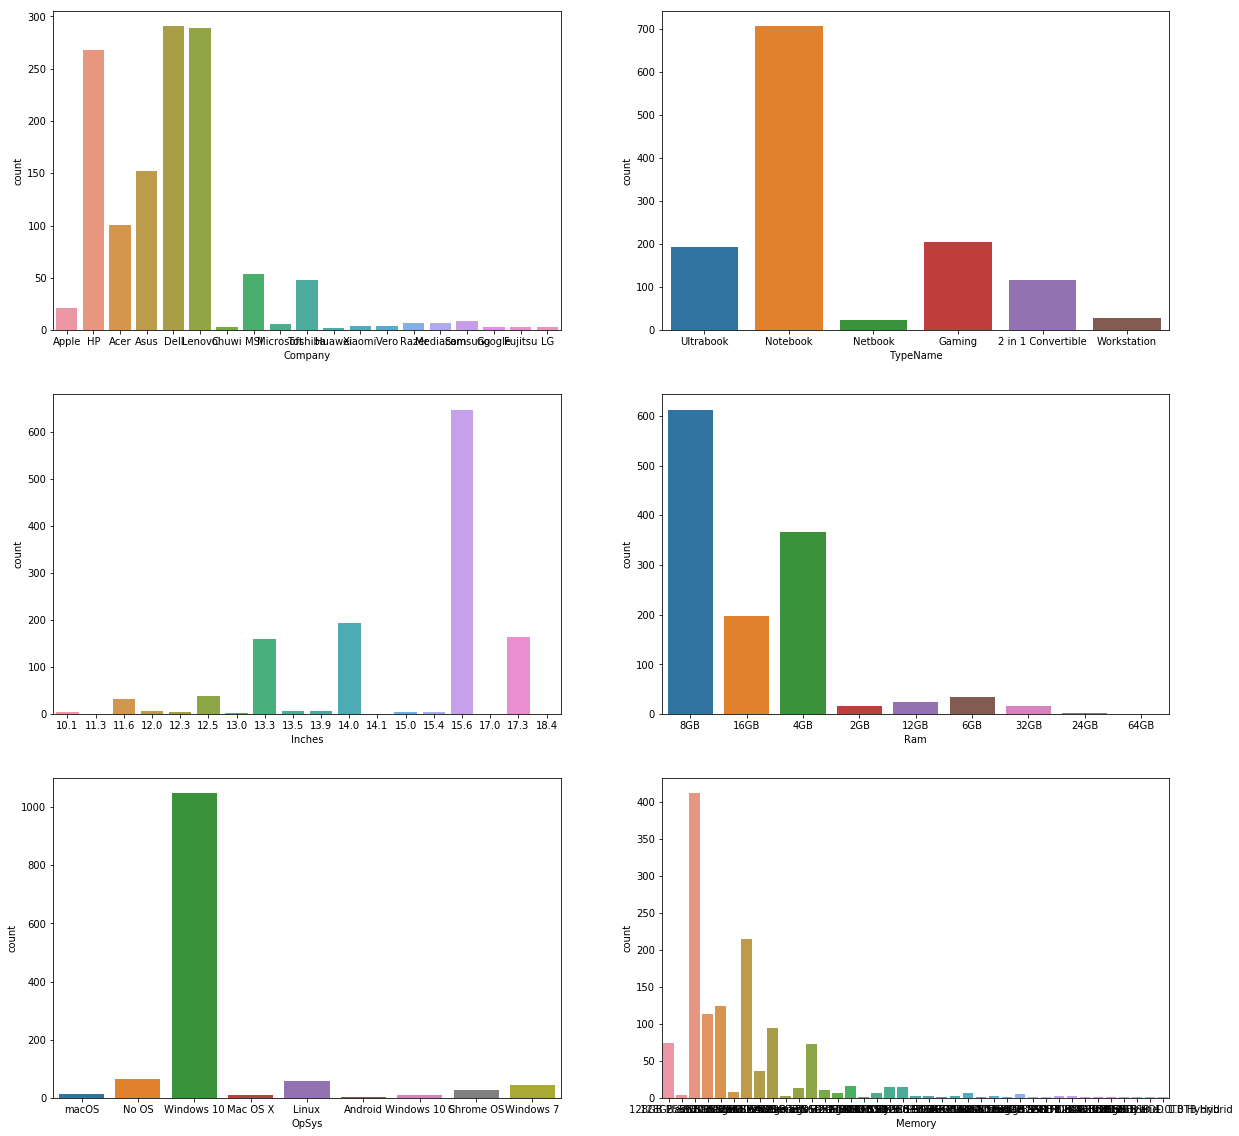

In [6]:
## Visual to see many count plots at once

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,20))
sns.countplot(df['Company'], ax=ax[0,0])
sns.countplot(df['TypeName'], ax=ax[0,1])
sns.countplot(df['Inches'], ax=ax[1,0])
sns.countplot(df['Ram'], ax=ax[1,1])
sns.countplot(df['OpSys'], ax=ax[2,0])
sns.countplot(df['Memory'], ax=ax[2,1])

### Review the features

As seen above, some of the feature's datatypes are objects, when they can be changed into integers or floats as more memory/weight may correlate with the price

In [7]:
df.Memory.unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [8]:
df.Weight.unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [9]:
df.Gpu.unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

Need to remove the text from the Weight and Ram features so they become numeric

In [10]:
#Change weight feature to numeric

df['Weight'] = df['Weight'].astype(str)
df['Weight'] = df['Weight'].str.strip()
df['Weight'] = df['Weight'].str.replace('kg', '', regex=False)
df['Weight'] = pd.to_numeric(df['Weight'], errors = 'coerce')

#Change RAM feature to numeric

df['Ram'] = df['Ram'].astype(str)
df['Ram'] = df['Ram'].str.strip()
df['Ram'] = df['Ram'].str.replace('GB', '', regex=False)
df['Ram'] = pd.to_numeric(df['Ram'], errors = 'coerce')


In [11]:
#Re-check the datatypes to see if above cell worked
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 12 columns):
Company             1275 non-null object
Product             1275 non-null object
TypeName            1275 non-null object
Inches              1275 non-null float64
ScreenResolution    1275 non-null object
Cpu                 1275 non-null object
Ram                 1275 non-null int64
Memory              1275 non-null object
Gpu                 1275 non-null object
OpSys               1275 non-null object
Weight              1275 non-null float64
Price_euros         1275 non-null float64
dtypes: float64(3), int64(1), object(8)
memory usage: 169.5+ KB


In [12]:
## Check the stats
df.describe()

,Inches,Ram,Weight,Price_euros
count,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059
std,1.429470,5.097809,0.669196,700.752504
min,10.100000,2.000000,0.690000,174.000000
25%,14.000000,4.000000,1.500000,609.000000
50%,15.600000,8.000000,2.040000,989.000000
75%,15.600000,8.000000,2.310000,1496.500000
max,18.400000,64.000000,4.700000,6099.000000


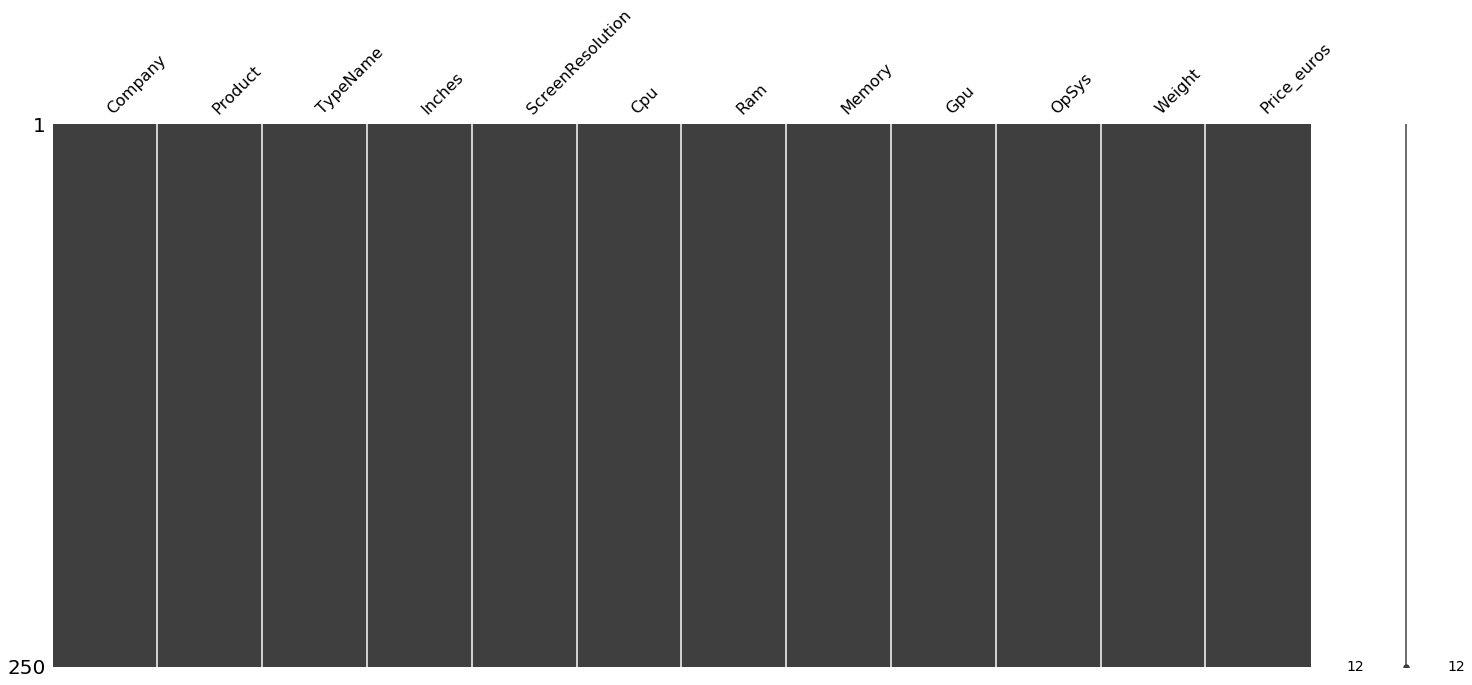

In [13]:
##Visually look to see how much missing data there is

import missingno as msno

msno.matrix(df.sample(250))

In [14]:
## Find how many null values
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

Normally brands focus on either being a premium brand or a cheaper alternative. A good example of this is that you don't see many $100 Rolex watches (at least, not in good condition). The reason being, is that brand can carry it's own 'status' and people who pay a lot of money for a brand, don't expect it to be diluted by cheaper alternatives.

Apple, MSI and Razer, LG are generally seen as 'expensive brands' in my opinion. And the box plot below also supports this.

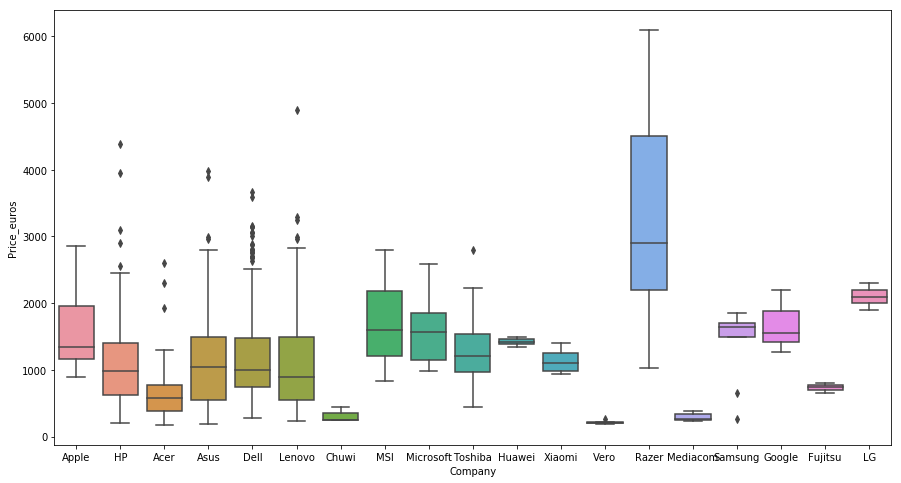

In [15]:
## Box plot

plt.figure(figsize=(15,8))
sns.boxplot(x="Company", y="Price_euros", data=df)
plt.show()

The types of laptops also vary in price, with gaming laptops and workstations being generally more expensive due to it's expected high performance.

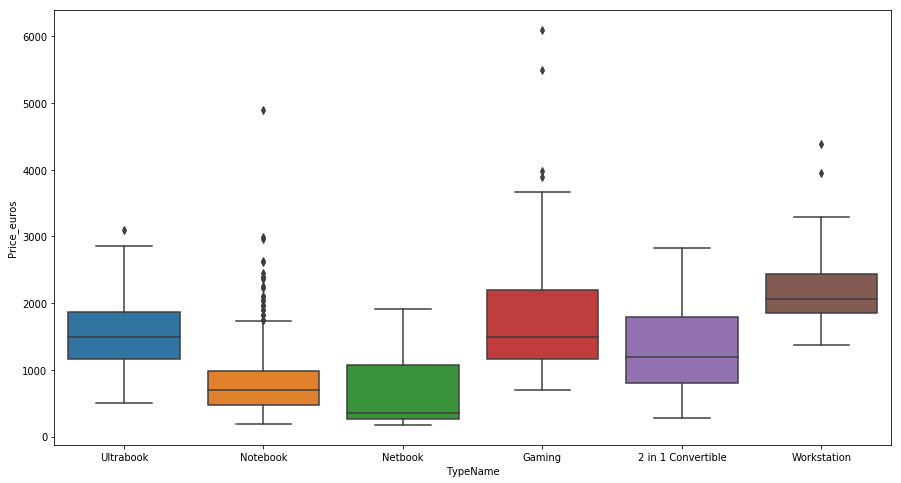

In [16]:
## Box plot

plt.figure(figsize=(15,8))
sns.boxplot(x="TypeName", y="Price_euros", data=df)
plt.show()


Below, I need to adjust the features in preparation for some machine learning techniques.

In [17]:
#Pre-Process Data


Comp = pd.get_dummies(df.Company, prefix='Company')
ScreenRes = pd.get_dummies(df.ScreenResolution, prefix='Screen_Resolution')
Mem = pd.get_dummies(df.Memory, prefix='Memory_Type')
Cp = pd.get_dummies(df.Cpu, prefix='CPU')
Gp = pd.get_dummies(df.Gpu, prefix='GPU')
Op = pd.get_dummies(df.OpSys, prefix='Operating_System')
Tname = pd.get_dummies(df.TypeName, prefix='Type_Name')

df = pd.concat([df, Comp, ScreenRes, Mem, Cp, Gp, Op, Tname], axis=1)

df.drop(['Company', 'ScreenResolution','Memory', 'Cpu', 'Gpu', 'OpSys', 'TypeName', 'Product'], axis=1, inplace=True)



In [18]:
pd.set_option('display.max_columns', 500)

df.head()

,Inches,Ram,Weight,Price_euros,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,Screen_Resolution_1366x768,Screen_Resolution_1440x900,Screen_Resolution_1600x900,Screen_Resolution_1920x1080,Screen_Resolution_2560x1440,Screen_Resolution_4K Ultra HD / Touchscreen 3840x2160,Screen_Resolution_4K Ultra HD 3840x2160,Screen_Resolution_Full HD / Touchscreen 1920x1080,Screen_Resolution_Full HD 1920x1080,Screen_Resolution_IPS Panel 1366x768,Screen_Resolution_IPS Panel 2560x1440,Screen_Resolution_IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Screen_Resolution_IPS Panel 4K Ultra HD 3840x2160,Screen_Resolution_IPS Panel Full HD / Touchscreen 1920x1080,Screen_Resolution_IPS Panel Full HD 1366x768,Screen_Resolution_IPS Panel Full HD 1920x1080,Screen_Resolution_IPS Panel Full HD 1920x1200,Screen_Resolution_IPS Panel Full HD 2160x1440,Screen_Resolution_IPS Panel Full HD 2560x1440,Screen_Resolution_IPS Panel Quad HD+ / Touchscreen 3200x1800,Screen_Resolution_IPS Panel Quad HD+ 2560x1440,Screen_Resolution_IPS Panel Quad HD+ 3200x1800,Screen_Resolution_IPS Panel Retina Display 2304x1440,Screen_Resolution_IPS Panel Retina Display 2560x1600,Screen_Resolution_IPS Panel Retina Display 2736x1824,Screen_Resolution_IPS Panel Retina Display 2880x1800,Screen_Resolution_IPS Panel Touchscreen / 4K Ultra HD 3840x2160,Screen_Resolution_IPS Panel Touchscreen 1366x768,Screen_Resolution_IPS Panel Touchscreen 1920x1200,Screen_Resolution_IPS Panel Touchscreen 2400x1600,Screen_Resolution_IPS Panel Touchscreen 2560x1440,Screen_Resolution_Quad HD+ / Touchscreen 3200x1800,Screen_Resolution_Quad HD+ 3200x1800,Screen_Resolution_Touchscreen / 4K Ultra HD 3840x2160,Screen_Resolution_Touchscreen / Full HD 1920x1080,Screen_Resolution_Touchscreen / Quad HD+ 3200x1800,Screen_Resolution_Touchscreen 1366x768,Screen_Resolution_Touchscreen 2256x1504,Screen_Resolution_Touchscreen 2400x1600,Screen_Resolution_Touchscreen 2560x1440,Memory_Type_1.0TB HDD,Memory_Type_1.0TB Hybrid,Memory_Type_128GB Flash Storage,Memory_Type_128GB HDD,Memory_Type_128GB SSD,Memory_Type_128GB SSD + 1TB HDD,Memory_Type_128GB SSD + 2TB HDD,Memory_Type_16GB Flash Storage,Memory_Type_16GB SSD,Memory_Type_180GB SSD,Memory_Type_1TB HDD,Memory_Type_1TB HDD + 1TB HDD,Memory_Type_1TB SSD,Memory_Type_1TB SSD + 1TB HDD,Memory_Type_240GB SSD,Memory_Type_256GB Flash Storage,Memory_Type_256GB SSD,Memory_Type_256GB SSD + 1.0TB Hybrid,Memory_Type_256GB SSD + 1TB HDD,Memory_Type_256GB SSD + 256GB SSD,Memory_Type_256GB SSD + 2TB HDD,Memory_Type_256GB SSD + 500GB HDD,Memory_Type_2TB HDD,Memory_Type_32GB Flash Storage,Memory_Type_32GB HDD,Memory_Type_32GB SSD,Memory_Type_500GB HDD,Memory_Type_508GB Hybrid,Memory_Type_512GB Flash Storage,Memory_Type_512GB SSD,Memory_Type_512GB SSD + 1.0TB Hybrid,Memory_Type_512GB SSD + 1TB HDD,Memory_Type_512GB SSD + 256GB SSD,Memory_Type_512GB SSD + 2TB HDD,Memory_Type_512GB SSD + 512GB SSD,Memory_Type_64GB Flash Storage,Memory_Type_64GB Flash Storage + 1TB HDD,Memory_Type_64GB SSD,Memory_Type_8GB SSD,CPU_AMD A10-Series 9600P 2.4GHz,CPU_AMD A10-Series 9620P 2.5GHz,CPU_AMD A10-Series A10-9620P 2.5GHz,CPU_AMD A12-Series 9700P 2.5GHz,CPU_AMD A12-Series 9720P 2.7GHz,CPU_AMD A12-Series 9720P 3.6GHz,CPU_AMD A4-Series 7210 2.2GHz,CPU_AMD A6-Series 7310 2GHz,CPU_AMD A6-Series 9220 2.5GHz,CPU_AMD A6-Series 9220 2.9GHz,CPU_AMD A6-Series A6-9220 2.5GHz,CPU_AMD A8-Series 7410 2.2GHz,CPU_AMD A9-Series 9410 2.9GHz,CPU_AMD A9-Series 9420 2.9GHz,CPU_AMD A9-Series 9420 3GHz,CPU_AMD A9-Series A9-9420 3GHz,CPU_AMD E-Series 6110 1.5GHz,CPU_AMD E-Series 7110 1.8GHz,CPU_AMD E-Series 9000 2.2GHz,CPU_AMD E-Series 9000e 1.5GHz,CPU_AMD E-Series E2-6110 1.5GHz,CPU_AMD E-Series E2-9000 2.2GHz,CPU_AMD E-Series E2-9000e 1.5GHz,CPU_AMD FX 8800P 2.1GHz,CPU_AMD FX 9830P 3GHz,CPU_AMD Ryzen 1600 3.2GHz,CPU_AMD

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Columns: 345 entries, Inches to Type_Name_Workstation
dtypes: float64(3), int64(1), uint8(341)
memory usage: 514.4 KB


As I am predicting price, it's useful to review the distribution of prices across all features.

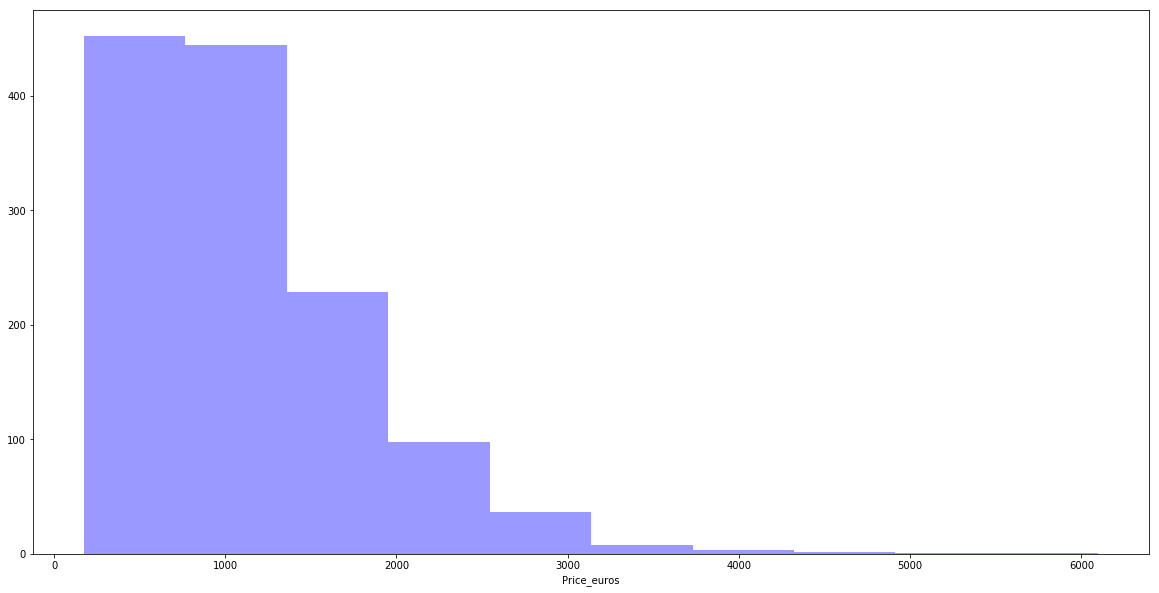

In [20]:
##Distribution plot
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(df['Price_euros'],color='blue', kde=False, bins=10)

In [21]:
## Only look for the columns with numbers
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Inches,Ram,Weight,Price_euros
0,13.3,8,1.37,1339.69
1,13.3,8,1.34,898.94
2,15.6,8,1.86,575.00
3,15.4,16,1.83,2537.45
4,13.3,8,1.37,1803.60


In [22]:
## See isolated correlation against Price

correlation = df_num.drop('Price_euros', axis=1).apply(lambda x: x.corr(df_num.Price_euros))
print(correlation.sort_values(ascending=False))

Ram       0.740287
Weight    0.211883
Inches    0.066608
dtype: float64


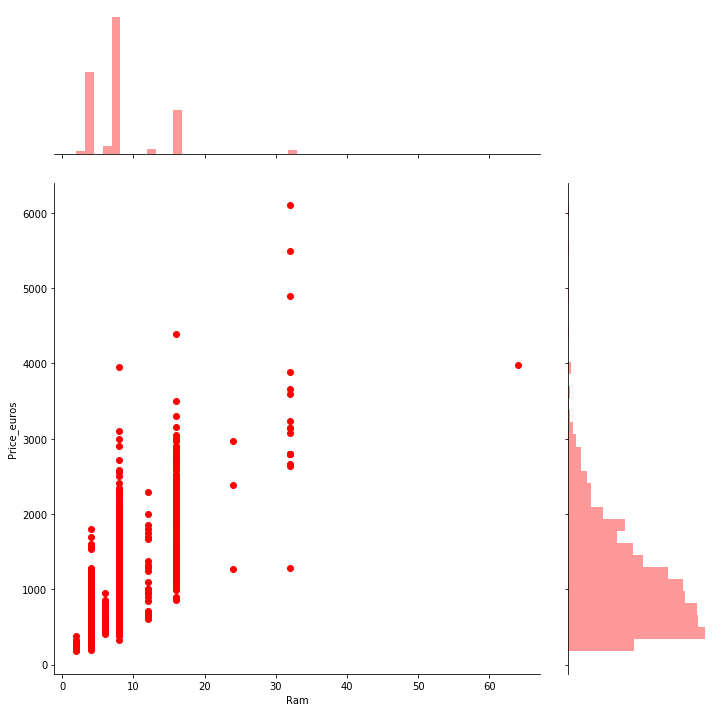

In [23]:
##Joint plot - scatter in middle and distribution on top and sides

sns.jointplot(x="Ram", y="Price_euros", data=df, height=10, ratio=3, color="r")
plt.show()

### Machine Learning

This is a regression problem, so different regression algorithms will be tested to see which has the best accuracy.

In [24]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

y_train = train['Price_euros']
y_test = test['Price_euros']

X_train = train.drop(['Price_euros'], axis=1)
X_test = test.drop(['Price_euros'], axis=1)

In [25]:
# Import machine learning modules

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 


# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    score = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    
    return train_pred, score



# Random Forest Regressor ----------------------------------------------------------------

train_pred_rfor, acc_rfor = fit_ml_algo(RandomForestRegressor(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)

In [26]:
# Linear Regression ---------------------------------------------------------------------

train_pred_lin, acc_lin = fit_ml_algo(LinearRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)

In [27]:
# Decision Tree Regressor --------------------------------------------------------------------

train_pred_dtr, acc_dtr = fit_ml_algo(DecisionTreeRegressor(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)

In [28]:
# Support Vector Regressor --------------------------------------------------------------------

train_pred_svr, acc_svr = fit_ml_algo(SVR(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)

In [29]:
# Accuracy Scores --------------------------------------------------------------------------

models = pd.DataFrame({
    'Model': ['RandomForestRegressor', 'LinearRegression', 'DecisionTreeRegressor', 'SVR' ],
    'Score': [
        acc_rfor,
        acc_lin, 
        acc_dtr, 
        acc_svr
    ]})
print("---Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Accuracy Scores---


,Model,Score
2,DecisionTreeRegressor,99.95
0,RandomForestRegressor,97.14
1,LinearRegression,93.07
3,SVR,4.86


### Training a model with just Ram, Weight and Inches as features...

In [30]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_num, test_size=0.2)

y_train2 = df_num['Price_euros']
y_test2 = df_num['Price_euros']

X_train2 = df_num[['Ram', 'Weight', 'Inches']]
X_test2 = df_num[['Ram', 'Weight', 'Inches']]

In [31]:
# Import machine learning modules

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 


# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train2, y_train2, cv):
    
    # One Pass
    model = algo.fit(X_train2, y_train2)
    score = round(model.score(X_train2, y_train2) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train2, 
                                                  y_train2, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    
    return train_pred, score



# Random Forest Regressor ----------------------------------------------------------------

train_pred_log, acc_rfor = fit_ml_algo(RandomForestRegressor(), 
                                                               X_train2, 
                                                               y_train2, 
                                                                    10)

In [32]:
# Linear Regression ---------------------------------------------------------------------

train_pred_log, acc_lin = fit_ml_algo(LinearRegression(), 
                                                               X_train2, 
                                                               y_train2, 
                                                                    10)

In [33]:
# Decision Tree Regressor --------------------------------------------------------------------

train_pred_knn, acc_dtr = fit_ml_algo(DecisionTreeRegressor(), 
                                                  X_train2, 
                                                  y_train2, 
                                                  10)

In [34]:
# Support Vector Regressor --------------------------------------------------------------------

train_pred_gaussian, acc_svr = fit_ml_algo(SVR(), 
                                                                      X_train2, 
                                                                      y_train2, 
                                                                           10)

In [35]:
# Accuracy Scores --------------------------------------------------------------------------

models = pd.DataFrame({
    'Model': ['RandomForestRegressor', 'LinearRegression', 'DecisionTreeRegressor', 'SVR' ],
    'Score': [
        acc_rfor,
        acc_lin, 
        acc_dtr, 
        acc_svr
    ]})
print("---Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Accuracy Scores---


,Model,Score
2,DecisionTreeRegressor,87.50
0,RandomForestRegressor,84.88
1,LinearRegression,56.17
3,SVR,9.39


Text(0.5, 1.0, 'Which Feature(s) are most important')

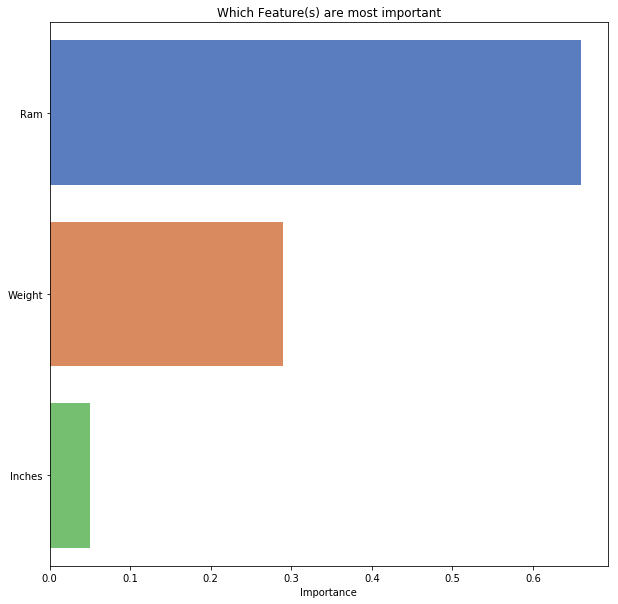

In [36]:
#Feature importance
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1)
rfr.fit(X_train2, y_train2)

f_im = rfr.feature_importances_.round(2)
rank = pd.Series(f_im, index=X_train2.columns).sort_values(ascending=False)

figsize = [10.0, 10.0]

plt.figure(figsize=figsize)
sns.barplot(y=rank.index,x=rank.values,palette='muted')
plt.xlabel('Importance')
plt.title('Which Feature(s) are most important')

In [37]:
print("Ram range is: ", df_num.Ram.min(),"-",df_num.Ram.max())
print("Weight range is: ", df_num.Weight.min(),"-",df_num.Weight.max())
print("Screen size range is: ", df_num.Inches.min(),"-",df_num.Inches.max())

Ram range is:  2 - 64
Weight range is:  0.69 - 4.7
Screen size range is:  10.1 - 18.4


In [38]:
## function to predict laptop price

dtr = DecisionTreeRegressor()

model = dtr.fit(X_train2, y_train2)

def laptop_price(Ram, Weight, Inches):
    
    print("Approximate laptop price $", round(float(model.predict([[Ram, Weight, Inches]])),2))

#Predict test

laptop_price(32, 1, 13)
print("The accuracy score is: ", round(model.score(X_train2, y_train2) * 100, 2),"%")

Approximate laptop price $ 2799.0
The accuracy score is:  87.5 %
